## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/DS3001/knn`

Q0.

1. What is the difference between regression and classification?
2. What is a confusion table? What does it help us understand about a model's performance?
3. What does the SSE quantify about a particular model?
4. What are overfitting and underfitting?
5. Why does splitting the data into training and testing sets, and choosing
 by evaluating accuracy or SSE on the test set, improve model performance?
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

## Q0 Answers

1. Regression is using data to predict numeric outcome. Classification is using data to predict a categorical outcome.
2. A confusion table cross tabulates how close our predictions were to the true values. It will show where the model is accurate and where it did not predict correctly.
3. SSE is the sum of squared error. It tells us how well the model fits the data.
4. Overfitting is when your model is too complex to explain the phenomenon.This gives accurate results for the training set but not the test set.Underfitting is when your model is too simple. This gives innacurate results for the training and test set.
5. This prevents overfitting. It gives more accurate estimates for how it will perform when it's not using the training set.
6. prediction strengths- simple to understand
prediction weakness- misinterpretation
probability distribution strength- gives uncertainty
probability distribution weakness- complex

**Q1.** This question is a case study for $k$ nearest neighbor The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [2]:
! git clone https://github.com/DS3001/knn

fatal: destination path 'knn' already exists and is not an empty directory.


In [11]:
import numpy as np
import pandas as pd

cars = pd.read_csv("/content/knn/data/USA_cars_datasets.csv")
# cars.head()
cars = cars.loc[:,["price", "year", "mileage"]]
cars.head()
cars.describe()
cars.shape
cars.isna().sum()
# no NAs

# normalize
cars["year"] = (cars['year'] - cars['year'].min()) / (cars['year'].max() - cars['year'].min())
cars['mileage'] = (cars['mileage'] - cars['mileage'].min()) / (cars['mileage'].max() - cars['mileage'].min())

# 80% training, 20% eval
from sklearn.model_selection import train_test_split
y = cars['price']
X = cars.drop('price',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)


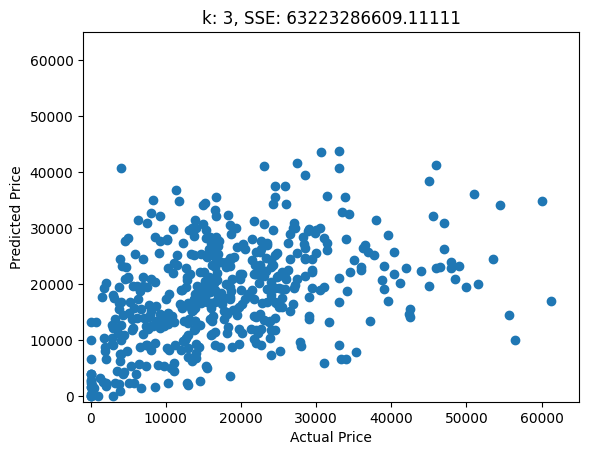

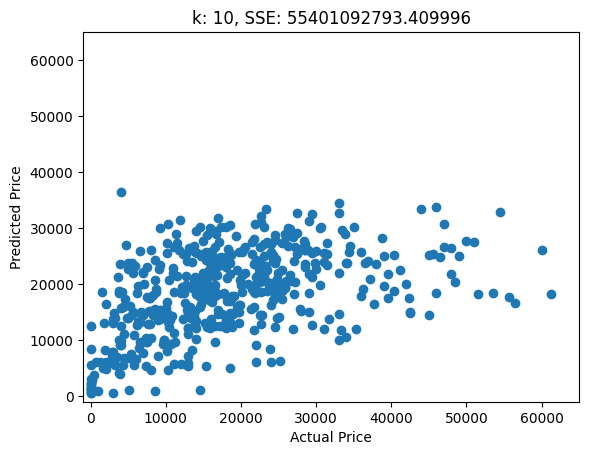

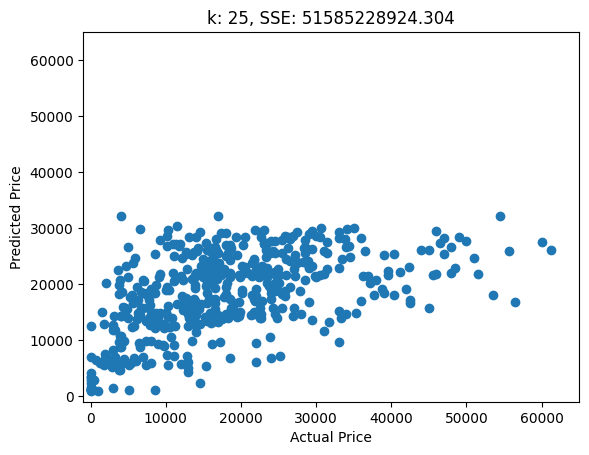

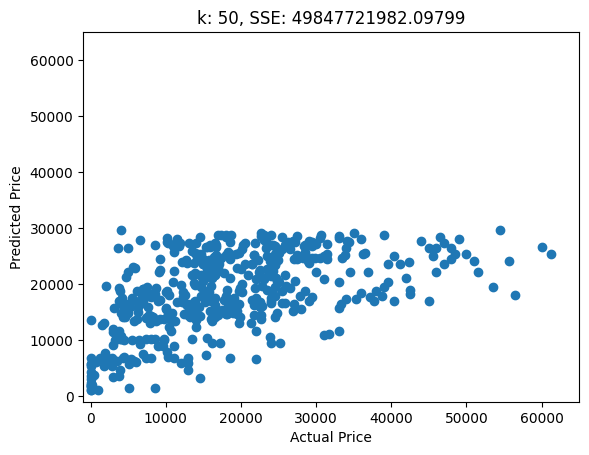

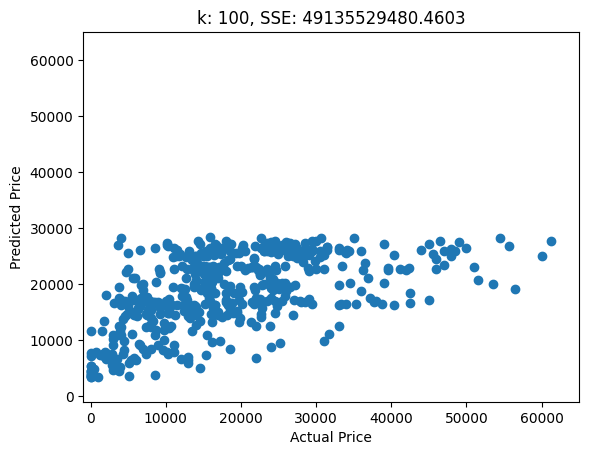

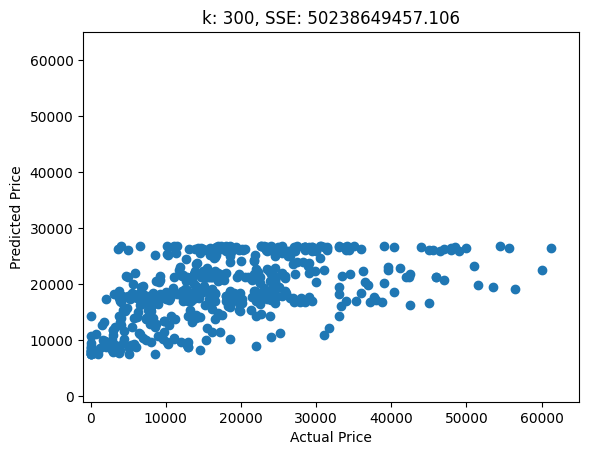

In [17]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

mse_values = []
for k in [3, 10, 25, 50, 100, 300]:
    model = KNeighborsRegressor(n_neighbors=k).fit(X_train, y_train)
    y_hat = model.predict(X_test)
    SSE = np.sum((y_test - y_hat) ** 2)
    MSE = mean_squared_error(y_test, y_hat) # mean squared error
    mse_values.append(MSE)
    plt.figure()
    plt.scatter(y_test, y_hat)
    plt.title(f'k: {k}, SSE: {SSE}')
    plt.ylim(-1000, 65000)
    plt.xlim(-1000, 65000)
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.show()


As k increases, the values become less spread out on the y axis. They kind of flatten.

[44]


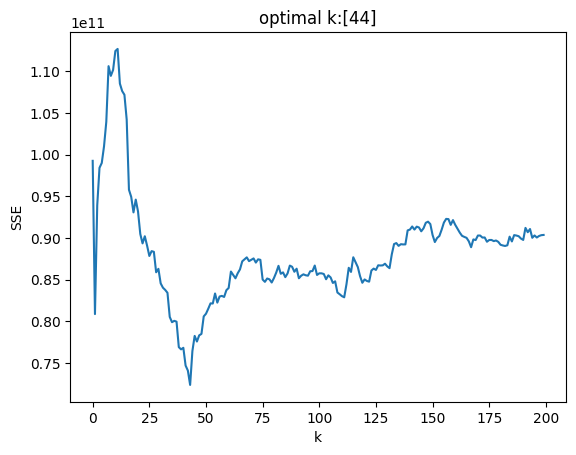

In [20]:
# optimal k
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

k_bar = 200 # Number of k's to try
k_grid = np.arange(1,k_bar) # The range of k's to consider
SSE = np.zeros(k_bar) # We'll store the accuracy here

for k in range(k_bar):
    model = KNeighborsClassifier(n_neighbors=k+1)
    fitted_model = model.fit(X_train.values,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test.values) # Predict values for test set
    SSE[k] = np.sum((y_hat - y_test )**2) # Accuracy on testing data

SSE_min = np.min(SSE) # Lowest recorded SSE
min_index = np.where(SSE==SSE_min) # Find the indices of y that equal the minimum
k_star = k_grid[min_index] # Find the optimal value of k
print(k_star)


plt.plot(np.arange(0,k_bar),SSE) # Plot SSE by k
plt.xlabel("k")
plt.title("optimal k:"+str(k_star))
plt.ylabel('SSE')
plt.show()

**Q2.** This question is a case study for $k$ nearest neighbor. The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables always better? Explain your findings.